In [1]:
import pandas as pd 
import numpy as np 
import geopandas as gpd 
import matplotlib.pyplot as plt 
import plotly
import sys

%matplotlib inline

In [3]:
us_counties = gpd.read_file("../shapefiles/county_shapefiles//tl_2017_us_county.shp")

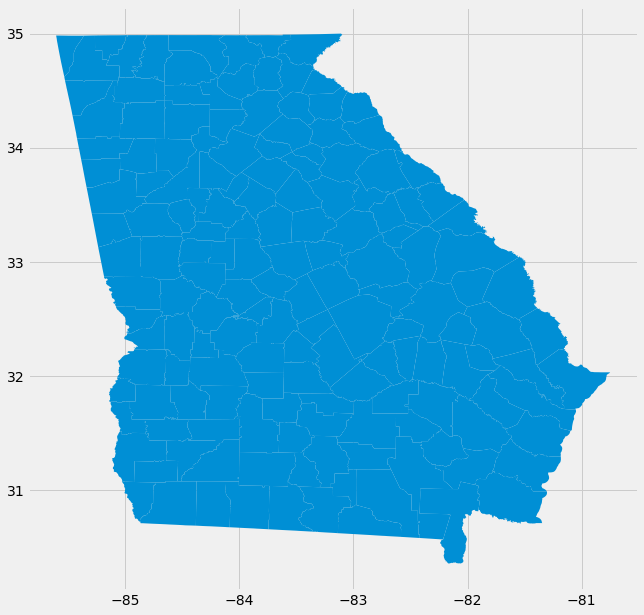

In [5]:
plt.style.use("fivethirtyeight")
plt.rcParams["figure.figsize"] = (20, 10)

us_counties[us_counties['STATEFP'] == str(13)].plot()
ga_counties = us_counties[us_counties['STATEFP'] == str(13)]
plt.show()

In [6]:
presidential_results = pd.read_excel("../data/georgia_elections_data/2020General/detail.xls.xlsx", sheet_name=1)


In [7]:
vote_names = ["ElectionDay", "Absentee", "Early", "Provisional", "Total"]
candidates = ["Trump", "Biden", "Jorgensen"] 
column_names = ['NAME']
for c in candidates: 
    for v in vote_names: 
        column_names.append(c + v)

column_names.append("Total")

In [8]:
presidential_results.rename(columns = {current: new for current, new in zip(presidential_results.columns, column_names)}, inplace = True)
presidential_results.drop([0, 1], axis = 0, inplace = True)

In [11]:
ga_counties = gpd.GeoDataFrame(pd.merge(ga_counties, presidential_results, on = ['NAME']))

<AxesSubplot:>

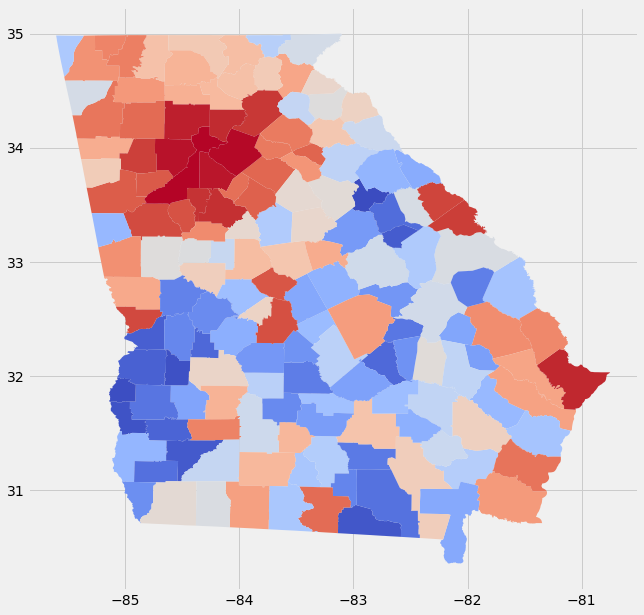

In [12]:
ga_counties.plot(column = "Total", cmap = "coolwarm")

In [16]:
sys.getsizeof(ga_counties)

279655